<a href="https://colab.research.google.com/github/qudwns2052/ai-sec-2020/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, AveragePooling2D
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy as scc
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt



In [2]:
def build_model(width, height, channel) :
  model = Sequential()

  model.add(Conv2D(
      filters = 16,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
      input_shape = (width, height, channel)
  ))
  model.add(Conv2D(
      filters = 16,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(MaxPooling2D(
      pool_size=(2,2),
      padding='same'
  ))

  model.add(Conv2D(
      filters = 32,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(MaxPooling2D(
      pool_size=(2,2),
      padding='same'
  ))

  model.add(Conv2D(
      filters = 64,
      kernel_size = (3, 3),
      padding = 'same',
      activation = 'relu',
  ))
  model.add(AveragePooling2D(
      pool_size=(8,8),
      padding='same'
  ))

  model.add(Flatten())
  model.add(Dense(
      units=640,
      activation='relu'
  ))
  model.add(Dense(
      units=10,
      activation='softmax'
  ))

  opt = Adam(learning_rate=0.001)
  model.compile(
      optimizer=opt,
      loss=scc,
      metrics=['accuracy']
  )

  return model


In [3]:
def data_preprocessing() :
  (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

  mean=[0,0,0]
  std=[0,0,0]
  newX_train = np.ones(X_train.shape)
  newX_test = np.ones(X_test.shape)

  for i in range(3) :
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])

  
  for i in range(3) :
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
  
  X_train = newX_train
  X_test = newX_test

  return (X_train, Y_train), (X_test, Y_test)


(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

model = build_model(X_train.shape[1], X_train.shape[2], X_train.shape[3])

hist = model.fit(
    X_train, 
    Y_train,
    batch_size = 32,
    epochs = 20,
    verbose = 1,
    shuffle=True,
    validation_split=0.1
)

model.evaluate(
    X_test,
    Y_test,
    verbose = 1
)

170500096/170498071 [==============================] - 7s 0us/step
Epoch 1/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5869 - accuracy: 0.4262 - val_loss: 1.3518 - val_accuracy: 0.5186
Epoch 2/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1913 - accuracy: 0.5731 - val_loss: 1.0944 - val_accuracy: 0.6070
Epoch 3/20
1407/1407 [==============================] - 5s 3ms/step - loss: 1.0131 - accuracy: 0.6387 - val_loss: 0.9597 - val_accuracy: 0.6620
Epoch 4/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.9197 - accuracy: 0.6746 - val_loss: 0.9134 - val_accuracy: 0.6772
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.8468 - accuracy: 0.7008 - val_loss: 0.8643 - val_accuracy: 0.6918
Epoch 6/20
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7879 - accuracy: 0.7233 - val_loss: 0.8533 - val_accuracy: 0.7028
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step -

[0.9202105402946472, 0.7289999723434448]

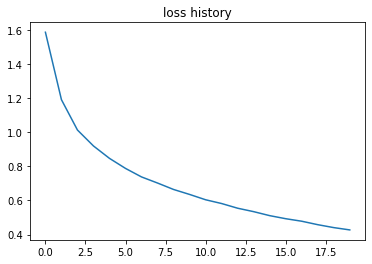

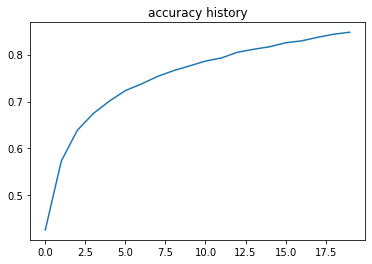

In [5]:
plt.plot(hist.history['loss'])
plt.title("loss history")
plt.show()

plt.plot(hist.history['accuracy'])
plt.title("accuracy history")
plt.show()